# Capstone Project
Diane Kierce

General Assembly Data Science Immersive

Seattle Cohort 02


### Covfefe: A Search for Meaning
 
#### Data Source:
On June 14-15, 2017 I used twitterscraper (https://github.com/taspinar/twitterscraper) to download all available tweets that matched the search term "covfefe" through Twitter's search function. The initial data set contained 531,980 tweets.

#### In this notebook:
This notebook contains the code I used to eliminate irrelevant tweets, preprocess the text, and engineer new features using word counts, word stemming, noun phrase extraction, detecting URL's and pictures in the tweets, and detecting where "covfefe" appears (in the tweet or in the user name).

In [9]:
import pandas as pd
import numpy as np
#from sklearn.preprocessing import LabelEncoder
#from HTMLParser import HTMLParser
#from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.snowball import SnowballStemmer
#from nltk.corpus import stopwords
#from nltk.tag import pos_tag
#from nltk.tokenize import WordPunctTokenizer
from textblob import TextBlob
from textacy.preprocess import preprocess_text
#from sklearn.feature_extraction.text import TfidfVectorizer
import regex as re

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

#from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
#from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import train_test_split
#from sklearn.model_selection import cross_val_score
#import patsy
#from sklearn.externals.six import StringIO  
#from IPython.display import Image  
#from sklearn.tree import export_graphviz
#import pydotplus
#from sklearn.cluster import DBSCAN
#from sklearn import metrics
#from sklearn.naive_bayes import MultinomialNB, BernoulliNB
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import BaggingClassifier
#from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
#from scipy.spatial.distance import pdist
#import os
#from gensim import corpora, models, matutils
#from collections import defaultdict

In [2]:
df = pd.read_json('./datasets/covfefe_tweets.json', encoding='utf-8')

df.shape

(531980, 5)

In [3]:
df.head(10)

,fullname,id,text,timestamp,user
0,Quinn Sweetzir,869706998433980416,"On a scale of 1-10, how good is mine and my br...",2017-05-31 00:08:01,QuinnSweetzir
1,Quinn Sweetzir,869707259315535872,Welcome to the westjet bottom of the 4th broug...,2017-05-31 00:09:03,QuinnSweetzir
2,Quinn Sweetzir,869707546772111360,They'll get 1 (I hope),2017-05-31 00:10:12,QuinnSweetzir
3,Quinn Sweetzir,869707754163716096,Damn. That was bad.,2017-05-31 00:11:01,QuinnSweetzir
4,Quinn Sweetzir,869708030786420736,Were they successful,2017-05-31 00:12:07,QuinnSweetzir
5,Quinn Sweetzir,869708245140520960,JD!,2017-05-31 00:12:58,QuinnSweetzir
6,Quinn Sweetzir,869708441908006912,I expect to be compensated. I'll DM you my adr...,2017-05-31 00:13:45,QuinnSweetzir
7,Quinn Sweetzir,869708559700721664,First W of my life,2017-05-31 00:14:13,QuinnSweetzir
8,Quinn Sweetzir,869708925335027712,JOSE!,2017-05-31 00:15:40,QuinnSweetzir
9,Quinn Sweetzir,869710386991292416,Russ!,2017-05-31 00:21:29,QuinnSweetzir


In [4]:
# http://textacy.readthedocs.io/en/latest/
# creating a simplified text feature to do NLP on

tweet_text = df['text'].values
clean_text = [preprocess_text(x, fix_unicode=True, lowercase=True, transliterate=False,
                              no_urls=True, no_emails=True, no_phone_numbers=True, no_currency_symbols=True,
                              no_punct=True, no_accents=True)
              for x in tweet_text]

In [5]:
df['plain_text'] = clean_text

In [6]:
fullnames = df['fullname'].values
clean_names = [preprocess_text(x, fix_unicode=True, lowercase=True, transliterate=False,
                              no_urls=True, no_emails=True, no_phone_numbers=True, no_currency_symbols=True,
                              no_punct=True, no_accents=True)
              for x in fullnames]

In [7]:
df['plain_names'] = clean_names

In [10]:
df['simple_text'] = [re.compile("[^\w']|_").sub(" ",text) for text in df['text']]

In [11]:
df['simple_text'] = [x.lower() for x in df['simple_text']]

In [12]:
df.head()

,fullname,id,text,timestamp,user,plain_text,plain_names,simple_text
0,Quinn Sweetzir,869706998433980416,"On a scale of 1-10, how good is mine and my br...",2017-05-31 00:08:01,QuinnSweetzir,on a scale of 110 how good is mine and my brot...,quinn sweetzir,on a scale of 1 10 how good is mine and my br...
1,Quinn Sweetzir,869707259315535872,Welcome to the westjet bottom of the 4th broug...,2017-05-31 00:09:03,QuinnSweetzir,welcome to the westjet bottom of the 4th broug...,quinn sweetzir,welcome to the westjet bottom of the 4th broug...
2,Quinn Sweetzir,869707546772111360,They'll get 1 (I hope),2017-05-31 00:10:12,QuinnSweetzir,theyll get 1 i hope,quinn sweetzir,they'll get 1 i hope
3,Quinn Sweetzir,869707754163716096,Damn. That was bad.,2017-05-31 00:11:01,QuinnSweetzir,damn that was bad,quinn sweetzir,damn that was bad
4,Quinn Sweetzir,869708030786420736,Were they successful,2017-05-31 00:12:07,QuinnSweetzir,were they successful,quinn sweetzir,were they successful


In [13]:
# Printing summary information

print 'shape: %d rows, %d cols\n' % df.shape
    
print 'column info:'
for col in df.columns:
    print '* %s: %d nulls, %d unique vals, most common: %s' % (
            col,
            df[col].isnull().sum(),
            df[col].nunique(),
            df[col].value_counts().head().to_dict()
        )
print '\n------\n'

shape: 531980 rows, 8 cols

column info:
* fullname: 0 nulls, 179645 unique vals, most common: {u'Deplorable Covfefe': 1883, u'Covfefe in my DNA': 1245, u'Covfefe': 7864, u'WHAT IN THE COVFEFE': 1091, u'covfefe': 8221}
* id: 0 nulls, 531864 unique vals, most common: {869779363054718976: 2, 869788309030969344: 2, 869793773894725632: 2, 872182468845211648: 2, 869773446934405120: 2}
* text: 0 nulls, 492877 unique vals, most common: {u'': 2164, u'#covfefe': 1992, u'covfefe': 2784, u'#Covfefe': 1306, u'Covfefe': 4104}
* timestamp: 0 nulls, 293954 unique vals, most common: {Timestamp('2017-05-31 05:19:41'): 51, Timestamp('2017-05-31 05:21:05'): 48, Timestamp('2017-05-31 05:01:05'): 50, Timestamp('2017-05-31 05:24:11'): 49, Timestamp('2017-05-31 05:19:55'): 48}
* user: 0 nulls, 198590 unique vals, most common: {u'hispanic4DTrump': 1073, u'coldestwinters': 1091, u'Shogun_Saimoto': 1245, u'JenBCurly': 1033, u'InPlay88': 1524}
* plain_text: 0 nulls, 449674 unique vals, most common: {u'covfefe ur

In [14]:
df.dtypes

fullname               object
id                      int64
text                   object
timestamp      datetime64[ns]
user                   object
plain_text             object
plain_names            object
simple_text            object
dtype: object

In [15]:
# calculating the length of each tweet in number of words + 1 for each, e.g., URL

df['tweet_length'] = [len(s.split()) for s in df['plain_text']]

df.head(2)

,fullname,id,text,timestamp,user,plain_text,plain_names,simple_text,tweet_length
0,Quinn Sweetzir,869706998433980416,"On a scale of 1-10, how good is mine and my br...",2017-05-31 00:08:01,QuinnSweetzir,on a scale of 110 how good is mine and my brot...,quinn sweetzir,on a scale of 1 10 how good is mine and my br...,15
1,Quinn Sweetzir,869707259315535872,Welcome to the westjet bottom of the 4th broug...,2017-05-31 00:09:03,QuinnSweetzir,welcome to the westjet bottom of the 4th broug...,quinn sweetzir,welcome to the westjet bottom of the 4th broug...,16


In [16]:
# calculating the length of each tweet in number of words based on the simpler cleaning

df['tweet_simple_length'] = [len(s.split()) for s in df['simple_text']]

df.head(2)

,fullname,id,text,timestamp,user,plain_text,plain_names,simple_text,tweet_length,tweet_simple_length
0,Quinn Sweetzir,869706998433980416,"On a scale of 1-10, how good is mine and my br...",2017-05-31 00:08:01,QuinnSweetzir,on a scale of 110 how good is mine and my brot...,quinn sweetzir,on a scale of 1 10 how good is mine and my br...,15,22
1,Quinn Sweetzir,869707259315535872,Welcome to the westjet bottom of the 4th broug...,2017-05-31 00:09:03,QuinnSweetzir,welcome to the westjet bottom of the 4th broug...,quinn sweetzir,welcome to the westjet bottom of the 4th broug...,16,16


In [17]:
x = pd.DataFrame(df['tweet_length'].value_counts())

x.head(25)

,tweet_length
1,36436
6,30139
5,30022
2,29259
7,29210
8,27917
4,27849
9,26716
10,25632
3,24653


In [18]:
x.sort_index(ascending=True, inplace=True)

x

,tweet_length
0,2339
1,36436
2,29259
3,24653
4,27849
5,30022
6,30139
7,29210
8,27917
9,26716


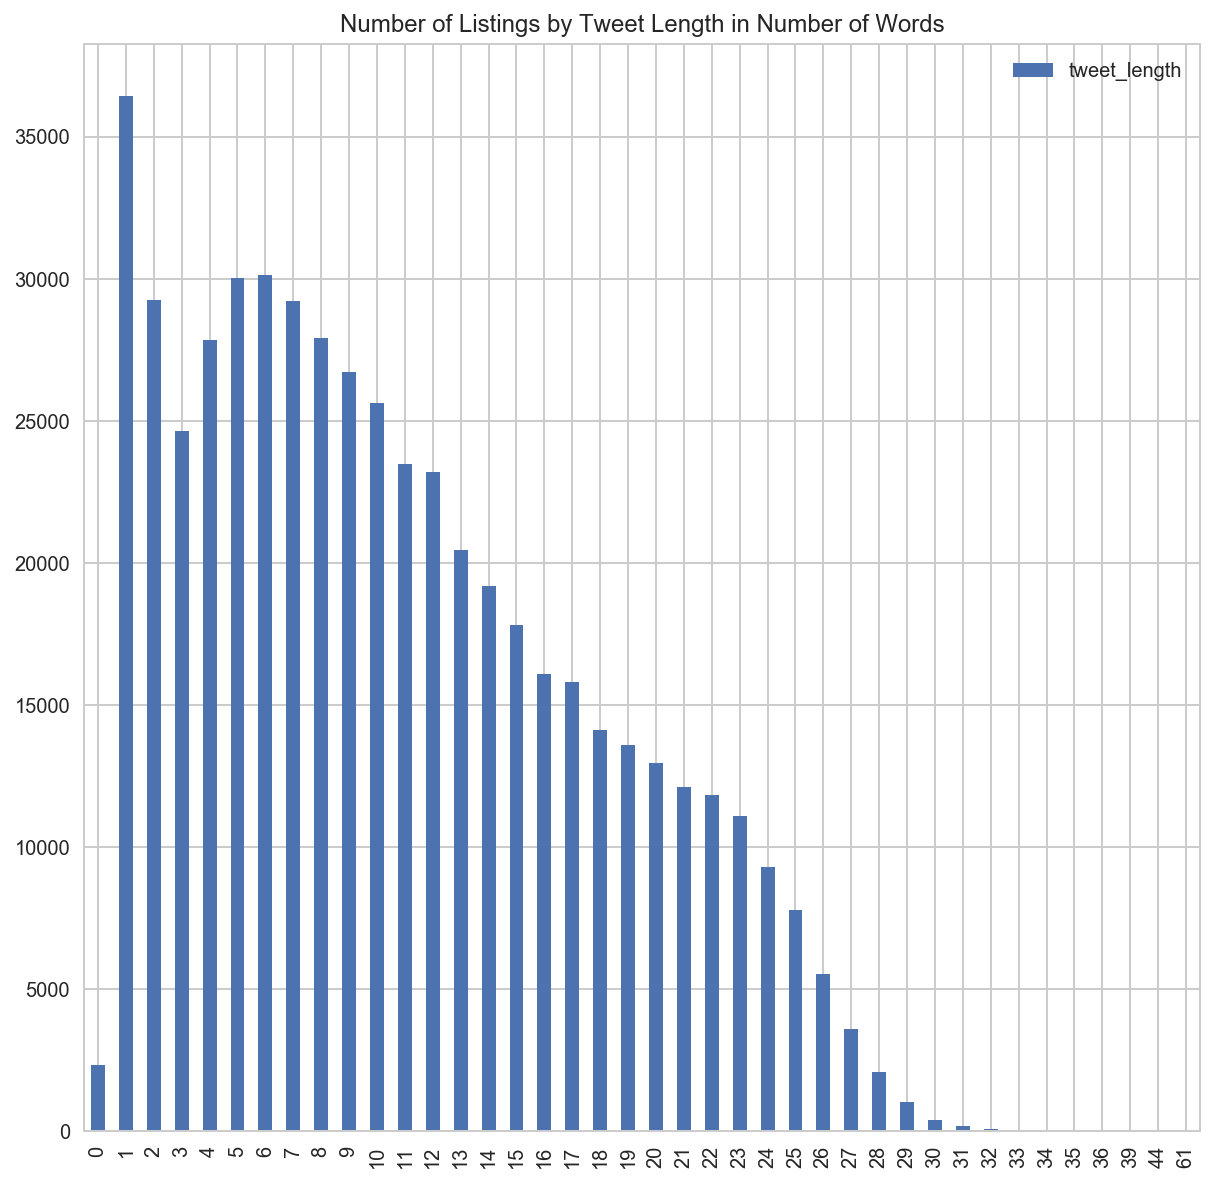

In [19]:
plt.figure()
x.plot.bar(title="Number of Listings by Tweet Length in Number of Words", figsize=(10,10))

In [20]:
# extracting noun phrases from plain_text using TextBlob

df['tweet_noun_phrases'] = [TextBlob(t).noun_phrases for t in df['plain_text']]

df.head(15)

,fullname,id,text,timestamp,user,plain_text,plain_names,simple_text,tweet_length,tweet_simple_length,tweet_noun_phrases
0,Quinn Sweetzir,869706998433980416,"On a scale of 1-10, how good is mine and my br...",2017-05-31 00:08:01,QuinnSweetzir,on a scale of 110 how good is mine and my brot...,quinn sweetzir,on a scale of 1 10 how good is mine and my br...,15,22,[brothers impression]
1,Quinn Sweetzir,869707259315535872,Welcome to the westjet bottom of the 4th broug...,2017-05-31 00:09:03,QuinnSweetzir,welcome to the westjet bottom of the 4th broug...,quinn sweetzir,welcome to the westjet bottom of the 4th broug...,16,16,"[westjet bottom, acer sonnet]"
2,Quinn Sweetzir,869707546772111360,They'll get 1 (I hope),2017-05-31 00:10:12,QuinnSweetzir,theyll get 1 i hope,quinn sweetzir,they'll get 1 i hope,5,5,[i hope]
3,Quinn Sweetzir,869707754163716096,Damn. That was bad.,2017-05-31 00:11:01,QuinnSweetzir,damn that was bad,quinn sweetzir,damn that was bad,4,4,[]
4,Quinn Sweetzir,869708030786420736,Were they successful,2017-05-31 00:12:07,QuinnSweetzir,were they successful,quinn sweetzir,were they successful,3,3,[]
5,Quinn Sweetzir,869708245140520960,JD!,2017-05-31 00:12:58,QuinnSweetzir,jd,quinn sweetzir,jd,1,1,[]
6,Quinn Sweetzir,869708441908006912,I expect to be compensated. I'll DM you my adr...,2017-05-31 00:13:45,QuinnSweetzir,i expect to be compensated ill dm you my adres...,quinn sweetzir,i expect to be compensated i'll dm you my adr...,22,28,[]
7,Quinn Sweetzir,869708559700721664,First W of my life,2017-05-31 00:14:13,QuinnSweetzir,first w of my life,quinn sweetzir,first w of my life,5,5,[]
8,Quinn Sweetzir,869708925335027712,JOSE!,2017-05-31 00:15:40,QuinnSweetzir,jose,quinn sweetzir,jose,1,1,[]
9,Quinn Sweetzir,869710386991292416,Russ!,2017-05-31 00:21:29,QuinnSweetzir,russ,quinn sweetzir,russ,1,1,[]


In [21]:
# putting the words into lists
df['tweet_words'] = [TextBlob(x).words for x in df['plain_text']]

df.head()

,fullname,id,text,timestamp,user,plain_text,plain_names,simple_text,tweet_length,tweet_simple_length,tweet_noun_phrases,tweet_words
0,Quinn Sweetzir,869706998433980416,"On a scale of 1-10, how good is mine and my br...",2017-05-31 00:08:01,QuinnSweetzir,on a scale of 110 how good is mine and my brot...,quinn sweetzir,on a scale of 1 10 how good is mine and my br...,15,22,[brothers impression],"[on, a, scale, of, 110, how, good, is, mine, a..."
1,Quinn Sweetzir,869707259315535872,Welcome to the westjet bottom of the 4th broug...,2017-05-31 00:09:03,QuinnSweetzir,welcome to the westjet bottom of the 4th broug...,quinn sweetzir,welcome to the westjet bottom of the 4th broug...,16,16,"[westjet bottom, acer sonnet]","[welcome, to, the, westjet, bottom, of, the, 4..."
2,Quinn Sweetzir,869707546772111360,They'll get 1 (I hope),2017-05-31 00:10:12,QuinnSweetzir,theyll get 1 i hope,quinn sweetzir,they'll get 1 i hope,5,5,[i hope],"[theyll, get, 1, i, hope]"
3,Quinn Sweetzir,869707754163716096,Damn. That was bad.,2017-05-31 00:11:01,QuinnSweetzir,damn that was bad,quinn sweetzir,damn that was bad,4,4,[],"[damn, that, was, bad]"
4,Quinn Sweetzir,869708030786420736,Were they successful,2017-05-31 00:12:07,QuinnSweetzir,were they successful,quinn sweetzir,were they successful,3,3,[],"[were, they, successful]"


In [22]:
# stemming the words from each tweet

stemmer = SnowballStemmer('english')
df['tweet_stems'] = [[stemmer.stem(w) for w in word_list] for word_list in df['tweet_words']]

df.head()

,fullname,id,text,timestamp,user,plain_text,plain_names,simple_text,tweet_length,tweet_simple_length,tweet_noun_phrases,tweet_words,tweet_stems
0,Quinn Sweetzir,869706998433980416,"On a scale of 1-10, how good is mine and my br...",2017-05-31 00:08:01,QuinnSweetzir,on a scale of 110 how good is mine and my brot...,quinn sweetzir,on a scale of 1 10 how good is mine and my br...,15,22,[brothers impression],"[on, a, scale, of, 110, how, good, is, mine, a...","[on, a, scale, of, 110, how, good, is, mine, a..."
1,Quinn Sweetzir,869707259315535872,Welcome to the westjet bottom of the 4th broug...,2017-05-31 00:09:03,QuinnSweetzir,welcome to the westjet bottom of the 4th broug...,quinn sweetzir,welcome to the westjet bottom of the 4th broug...,16,16,"[westjet bottom, acer sonnet]","[welcome, to, the, westjet, bottom, of, the, 4...","[welcom, to, the, westjet, bottom, of, the, 4t..."
2,Quinn Sweetzir,869707546772111360,They'll get 1 (I hope),2017-05-31 00:10:12,QuinnSweetzir,theyll get 1 i hope,quinn sweetzir,they'll get 1 i hope,5,5,[i hope],"[theyll, get, 1, i, hope]","[theyll, get, 1, i, hope]"
3,Quinn Sweetzir,869707754163716096,Damn. That was bad.,2017-05-31 00:11:01,QuinnSweetzir,damn that was bad,quinn sweetzir,damn that was bad,4,4,[],"[damn, that, was, bad]","[damn, that, was, bad]"
4,Quinn Sweetzir,869708030786420736,Were they successful,2017-05-31 00:12:07,QuinnSweetzir,were they successful,quinn sweetzir,were they successful,3,3,[],"[were, they, successful]","[were, they, success]"


In [23]:
# putting the words into lists
df['tweet_words_simple'] = [TextBlob(x).words for x in df['simple_text']]

df.head()

,fullname,id,text,timestamp,user,plain_text,plain_names,simple_text,tweet_length,tweet_simple_length,tweet_noun_phrases,tweet_words,tweet_stems,tweet_words_simple
0,Quinn Sweetzir,869706998433980416,"On a scale of 1-10, how good is mine and my br...",2017-05-31 00:08:01,QuinnSweetzir,on a scale of 110 how good is mine and my brot...,quinn sweetzir,on a scale of 1 10 how good is mine and my br...,15,22,[brothers impression],"[on, a, scale, of, 110, how, good, is, mine, a...","[on, a, scale, of, 110, how, good, is, mine, a...","[on, a, scale, of, 1, 10, how, good, is, mine,..."
1,Quinn Sweetzir,869707259315535872,Welcome to the westjet bottom of the 4th broug...,2017-05-31 00:09:03,QuinnSweetzir,welcome to the westjet bottom of the 4th broug...,quinn sweetzir,welcome to the westjet bottom of the 4th broug...,16,16,"[westjet bottom, acer sonnet]","[welcome, to, the, westjet, bottom, of, the, 4...","[welcom, to, the, westjet, bottom, of, the, 4t...","[welcome, to, the, westjet, bottom, of, the, 4..."
2,Quinn Sweetzir,869707546772111360,They'll get 1 (I hope),2017-05-31 00:10:12,QuinnSweetzir,theyll get 1 i hope,quinn sweetzir,they'll get 1 i hope,5,5,[i hope],"[theyll, get, 1, i, hope]","[theyll, get, 1, i, hope]","[they, 'll, get, 1, i, hope]"
3,Quinn Sweetzir,869707754163716096,Damn. That was bad.,2017-05-31 00:11:01,QuinnSweetzir,damn that was bad,quinn sweetzir,damn that was bad,4,4,[],"[damn, that, was, bad]","[damn, that, was, bad]","[damn, that, was, bad]"
4,Quinn Sweetzir,869708030786420736,Were they successful,2017-05-31 00:12:07,QuinnSweetzir,were they successful,quinn sweetzir,were they successful,3,3,[],"[were, they, successful]","[were, they, success]","[were, they, successful]"


In [24]:
# stemming the words from each tweet

stemmer = SnowballStemmer('english')
df['tweet_stems_simple'] = [[stemmer.stem(w) for w in word_list] for word_list in df['tweet_words_simple']]

df.head()

,fullname,id,text,timestamp,user,plain_text,plain_names,simple_text,tweet_length,tweet_simple_length,tweet_noun_phrases,tweet_words,tweet_stems,tweet_words_simple,tweet_stems_simple
0,Quinn Sweetzir,869706998433980416,"On a scale of 1-10, how good is mine and my br...",2017-05-31 00:08:01,QuinnSweetzir,on a scale of 110 how good is mine and my brot...,quinn sweetzir,on a scale of 1 10 how good is mine and my br...,15,22,[brothers impression],"[on, a, scale, of, 110, how, good, is, mine, a...","[on, a, scale, of, 110, how, good, is, mine, a...","[on, a, scale, of, 1, 10, how, good, is, mine,...","[on, a, scale, of, 1, 10, how, good, is, mine,..."
1,Quinn Sweetzir,869707259315535872,Welcome to the westjet bottom of the 4th broug...,2017-05-31 00:09:03,QuinnSweetzir,welcome to the westjet bottom of the 4th broug...,quinn sweetzir,welcome to the westjet bottom of the 4th broug...,16,16,"[westjet bottom, acer sonnet]","[welcome, to, the, westjet, bottom, of, the, 4...","[welcom, to, the, westjet, bottom, of, the, 4t...","[welcome, to, the, westjet, bottom, of, the, 4...","[welcom, to, the, westjet, bottom, of, the, 4t..."
2,Quinn Sweetzir,869707546772111360,They'll get 1 (I hope),2017-05-31 00:10:12,QuinnSweetzir,theyll get 1 i hope,quinn sweetzir,they'll get 1 i hope,5,5,[i hope],"[theyll, get, 1, i, hope]","[theyll, get, 1, i, hope]","[they, 'll, get, 1, i, hope]","[they, ll, get, 1, i, hope]"
3,Quinn Sweetzir,869707754163716096,Damn. That was bad.,2017-05-31 00:11:01,QuinnSweetzir,damn that was bad,quinn sweetzir,damn that was bad,4,4,[],"[damn, that, was, bad]","[damn, that, was, bad]","[damn, that, was, bad]","[damn, that, was, bad]"
4,Quinn Sweetzir,869708030786420736,Were they successful,2017-05-31 00:12:07,QuinnSweetzir,were they successful,quinn sweetzir,were they successful,3,3,[],"[were, they, successful]","[were, they, success]","[were, they, successful]","[were, they, success]"


In [25]:
df_tweet = df[df['plain_text'].map(lambda x: 'covfefe' in x)]

In [26]:
df_tweet.head(20)

,fullname,id,text,timestamp,user,plain_text,plain_names,simple_text,tweet_length,tweet_simple_length,tweet_noun_phrases,tweet_words,tweet_stems,tweet_words_simple,tweet_stems_simple
44,#TrumpVerbatim,869766996195385344,"""Despite the constant negative press covfefe"" ...",2017-05-31 04:06:26,VerbatimPOTUS,despite the constant negative press covfefe tr...,trumpverbatim,despite the constant negative press covfefe ...,7,7,[constant negative press covfefe trumpverbatim],"[despite, the, constant, negative, press, covf...","[despit, the, constant, negat, press, covfef, ...","[despite, the, constant, negative, press, covf...","[despit, the, constant, negat, press, covfef, ..."
45,Trump Spell Check,869766999366303744,covfefe = coffee https://twitter.com/realDona...,2017-05-31 04:06:26,realSpelling,covfefe coffee url,trump spell check,covfefe coffee https twitter com realdona...,3,8,[covfefe coffee url],"[covfefe, coffee, url]","[covfef, coffe, url]","[covfefe, coffee, https, twitter, com, realdon...","[covfef, coffe, https, twitter, com, realdonal..."
46,Trump's Tweets,869767039459745792,Despite the constant negative press covfefe,2017-05-31 04:06:36,DJTCopier,despite the constant negative press covfefe,trumps tweets,despite the constant negative press covfefe,6,6,[constant negative press covfefe],"[despite, the, constant, negative, press, covf...","[despit, the, constant, negat, press, covfef]","[despite, the, constant, negative, press, covf...","[despit, the, constant, negat, press, covfef]"
47,Fuckface Clownstick,869767056253693952,Despite the constant negative press covfefe,2017-05-31 04:06:40,realdonald_,despite the constant negative press covfefe,fuckface clownstick,despite the constant negative press covfefe,6,6,[constant negative press covfefe],"[despite, the, constant, negative, press, covf...","[despit, the, constant, negat, press, covfef]","[despite, the, constant, negative, press, covf...","[despit, the, constant, negat, press, covfef]"
48,Tony,869767065472782336,covfefe for sure,2017-05-31 04:06:42,Tony_M816,covfefe for sure,tony,covfefe for sure,3,3,[],"[covfefe, for, sure]","[covfef, for, sure]","[covfefe, for, sure]","[covfef, for, sure]"
49,Kawngi,869767069788758016,covfefe,2017-05-31 04:06:43,OGKawngi,covfefe,kawngi,covfefe,1,1,[],[covfefe],[covfef],[covfefe],[covfef]
50,Chase Gallagher,869767090189750272,Covfefe!,2017-05-31 04:06:48,chasegallagher,covfefe,chase gallagher,covfefe,1,1,[],[covfefe],[covfef],[covfefe],[covfef]
51,"crossdefault, CFAFF",869767095763992576,#covfefe https://twitter.com/realDonaldTrump/s...,2017-05-31 04:06:49,crossdefault,covfefe url,crossdefault cfaff,covfefe https twitter com realdonaldtrump s...,2,7,[covfefe url],"[covfefe, url]","[covfef, url]","[covfefe, https, twitter, com, realdonaldtrump...","[covfef, https, twitter, com, realdonaldtrump,..."
52,I D A S L I D,869767102370074624,"covfefe to you too, sir",2017-05-31 04:06:51,_ShawarmaKing,covfefe to you too sir,i d a s l i d,covfefe to you too sir,5,5,[],"[covfefe, to, you, too, sir]","[covfef, to, you, too, sir]","[covfefe, to, you, too, sir]","[covfef, to, you, too, sir]"
53,Rebecca Lewis,869767123874136064,Covfefe?!?,2017-05-31 04:06:56,BeckiLewis,covfefe,rebecca lewis,covfefe,1,1,[],[covfefe],[covfef],[covfefe],[covfef]


In [27]:
df_tweet.shape

(323607, 15)

In [28]:
df_user = df[df['user'].map(lambda x: 'covfefe' in x.lower()) | 
             df['plain_names'].map(lambda x: 'covfefe' in x.lower())]

In [29]:
df_user.shape

(167464, 15)

In [30]:
df_user.head(20)

,fullname,id,text,timestamp,user,plain_text,plain_names,simple_text,tweet_length,tweet_simple_length,tweet_noun_phrases,tweet_words,tweet_stems,tweet_words_simple,tweet_stems_simple
11,Gabriel Lyons,869713601581518848,35MM screening of Cleo from 5 to 7 presented b...,2017-05-31 00:34:15,el_covfefe,35mm screening of cleo from 5 to 7 presented b...,gabriel lyons,35mm screening of cleo from 5 to 7 presented b...,25,31,"[agnes varda, music box]","[35mm, screening, of, cleo, from, 5, to, 7, pr...","[35mm, screen, of, cleo, from, 5, to, 7, prese...","[35mm, screening, of, cleo, from, 5, to, 7, pr...","[35mm, screen, of, cleo, from, 5, to, 7, prese..."
27,Uncle Butch,869740593081065472,@BradTrent which one is the freak?,2017-05-31 02:21:31,not_my_covfefe,bradtrent which one is the freak,uncle butch,bradtrent which one is the freak,6,6,[],"[bradtrent, which, one, is, the, freak]","[bradtrent, which, one, is, the, freak]","[bradtrent, which, one, is, the, freak]","[bradtrent, which, one, is, the, freak]"
28,MIᄃΉΛΣᄂ I ΛM,869746706551783424,#WiKiBulletinw/Assangehttps://twitter.com/KimD...,2017-05-31 02:45:48,Covfefe_71,wikibulletinwassangehttpstwittercomkimdotcomst...,miᄃηλσᄂ i λm,wikibulletinw assangehttps twitter com kimd...,1,7,[],[wikibulletinwassangehttpstwittercomkimdotcoms...,[wikibulletinwassangehttpstwittercomkimdotcoms...,"[wikibulletinw, assangehttps, twitter, com, ki...","[wikibulletinw, assangehttp, twitter, com, kim..."
33,Gabriel Lyons,869750485808545792,me flirtingpic.twitter.com/239OcJ8cE1,2017-05-31 03:00:49,el_covfefe,me url,gabriel lyons,me flirtingpic twitter com 239ocj8ce1,2,5,[],"[me, url]","[me, url]","[me, flirtingpic, twitter, com, 239ocj8ce1]","[me, flirtingp, twitter, com, 239ocj8ce1]"
43,Animal 💝4Life 🐕 🐶 🐾,869766700257902592,So worried about Bitches! Hope she continues t...,2017-05-31 04:05:15,Covfefe_2017,so worried about bitches hope she continues to...,animal ��4life �� �� ��,so worried about bitches hope she continues t...,9,9,[bitches hope],"[so, worried, about, bitches, hope, she, conti...","[so, worri, about, bitch, hope, she, continu, ...","[so, worried, about, bitches, hope, she, conti...","[so, worri, about, bitch, hope, she, continu, ..."
515,🥃 El Covfefe 🥃,869767659369500672,#covfefe needs to be trending #1 now!!,2017-05-31 04:09:04,grime_optimus,covfefe needs to be trending 1 now,�� el covfefe ��,covfefe needs to be trending 1 now,7,7,[],"[covfefe, needs, to, be, trending, 1, now]","[covfef, need, to, be, trend, 1, now]","[covfefe, needs, to, be, trending, 1, now]","[covfef, need, to, be, trend, 1, now]"
556,Resist the Covfefe,869767701291343872,"""Covfefe"" Fail! https://twitter.com/realDonald...",2017-05-31 04:09:14,donacheung,covfefe fail url,resist the covfefe,covfefe fail https twitter com realdonald...,3,8,[],"[covfefe, fail, url]","[covfef, fail, url]","[covfefe, fail, https, twitter, com, realdonal...","[covfef, fail, https, twitter, com, realdonald..."
561,Covfefe for Prez,869767705670414336,#covfefe,2017-05-31 04:09:15,brendo2505,covfefe,covfefe for prez,covfefe,1,1,[],[covfefe],[covfef],[covfefe],[covfef]
589,brandmaster covfefe,869767721424044032,These fucking replies I'm dead #covfefe pic.tw...,2017-05-31 04:09:18,bdoooougs,these fucking replies im dead covfefe url,brandmaster covfefe,these fucking replies i'm dead covfefe pic tw...,7,10,[dead covfefe url],"[these, fucking, replies, im, dead, covfefe, url]","[these, fuck, repli, im, dead, covfef, url]","[these, fucking, replies, i, 'm, dead, covfefe...","[these, fuck, repli, i, 'm, dead, covfef, pic,..."
1074,I Am Covfefe,869768105203052544,covfefe pic.twitter.com/FXnQVXlB6d,2017-05-31 04:10:50,Firing69,covfefe url,i am covfefe,covfefe pic twitter com fxnqvxlb6d,2,5,[covfefe url],"[covfefe, url]","[covfef, url]","[covfefe, pic, twitter, com, fxnqvxlb6d]","[covfef, pic, twitter, com, fxnqvxlb6d]"


In [31]:
df_not = df[df['user'].map(lambda x: 'covfefe' not in x.lower()) & 
            df['plain_names'].map(lambda x: 'covfefe' not in x.lower()) & 
            df['plain_text'].map(lambda x: 'covfefe' not in x)]

In [32]:
df_not.shape

(45710, 15)

In [33]:
df_not.head()

,fullname,id,text,timestamp,user,plain_text,plain_names,simple_text,tweet_length,tweet_simple_length,tweet_noun_phrases,tweet_words,tweet_stems,tweet_words_simple,tweet_stems_simple
0,Quinn Sweetzir,869706998433980416,"On a scale of 1-10, how good is mine and my br...",2017-05-31 00:08:01,QuinnSweetzir,on a scale of 110 how good is mine and my brot...,quinn sweetzir,on a scale of 1 10 how good is mine and my br...,15,22,[brothers impression],"[on, a, scale, of, 110, how, good, is, mine, a...","[on, a, scale, of, 110, how, good, is, mine, a...","[on, a, scale, of, 1, 10, how, good, is, mine,...","[on, a, scale, of, 1, 10, how, good, is, mine,..."
1,Quinn Sweetzir,869707259315535872,Welcome to the westjet bottom of the 4th broug...,2017-05-31 00:09:03,QuinnSweetzir,welcome to the westjet bottom of the 4th broug...,quinn sweetzir,welcome to the westjet bottom of the 4th broug...,16,16,"[westjet bottom, acer sonnet]","[welcome, to, the, westjet, bottom, of, the, 4...","[welcom, to, the, westjet, bottom, of, the, 4t...","[welcome, to, the, westjet, bottom, of, the, 4...","[welcom, to, the, westjet, bottom, of, the, 4t..."
2,Quinn Sweetzir,869707546772111360,They'll get 1 (I hope),2017-05-31 00:10:12,QuinnSweetzir,theyll get 1 i hope,quinn sweetzir,they'll get 1 i hope,5,5,[i hope],"[theyll, get, 1, i, hope]","[theyll, get, 1, i, hope]","[they, 'll, get, 1, i, hope]","[they, ll, get, 1, i, hope]"
3,Quinn Sweetzir,869707754163716096,Damn. That was bad.,2017-05-31 00:11:01,QuinnSweetzir,damn that was bad,quinn sweetzir,damn that was bad,4,4,[],"[damn, that, was, bad]","[damn, that, was, bad]","[damn, that, was, bad]","[damn, that, was, bad]"
4,Quinn Sweetzir,869708030786420736,Were they successful,2017-05-31 00:12:07,QuinnSweetzir,were they successful,quinn sweetzir,were they successful,3,3,[],"[were, they, successful]","[were, they, success]","[were, they, successful]","[were, they, success]"


In [34]:
# These first rows in the subset do not in fact contain any noticeable connection to 'covfefe.' 
# Let's see if other rows in this subset might.

In [35]:
# Checking full names
df_not['fullname'].value_counts()

 💎                           608
Nuc Navy  ⚓ 🎆                482
nami cob nobbler              477
notstrongenoughComey          475
 ❄Think Smarter ❄             404
El  🐧                        399
the beard whisperer           373
satanico                      373
Captain Salazar               366
Da Sports GAWD                361
Batmonkey                     361
DC Cats  ❤ 🎁                 344
july 3  💃🏾 🎉               313
Yvonne                        307
Esly                          294
d  🇺🇸  🗽  🔔               284
coffee boy 咖啡男孩  🍑           272
ARION      🐣...hi            263
AllAbout2018                  262
Butt Soup                     252
 ⚓️Cov 🚥Fe 🗺Fe ⛲️™          248
paul richard  👁‍🗨           247
Baecon  🇭🇹                  243
ufans le                      241
Warpath 00-Sessions           238
lemme smash                   228
The PomPom Girl™              213
Simon Senpai                  211
Ouuuh Onizuka                 207
A 'White Hispanic' 🇺🇸       204
m

In [36]:
# Much better than before I removed the accents. There are still a few odd spellings slipping through, but not many.

In [37]:
# Checking user names
df_not['user'].value_counts()

saintlagerfeld     607
JHLewis5           482
comradenami        477
usaforyoubruv      475
ProudlyLiberal2    404
Gigio              399
pearIessence       373
UneekDiva          373
Rays_anatomy_      366
VitruvianMonkey    361
Pacman453323       361
DeeCeeCats         344
ingxbire           313
cooper__999        307
ToumsyBell         294
dougalpollux       284
zzap               272
OneAndOnlyArion    263
JCharlie916        262
Luge_Knight        252
paleblueeyes24     248
paulboy            247
4thQtr_Ninja       243
enSNAFU            241
Warpath72          238
mitsukibakugou     228
ThePomPomGirl      213
SimonSenpai        211
wutang_klan        207
awhite_hispanic    204
_miguellcz         201
12357Prime         192
Suite_Tea          185
BudWitzke          183
pixieg0ld          179
bluesatch          178
thermopylae11      170
Holly4humanity     170
ItsTheBAUCE        169
ImJustAMel         166
SweatyKeef         163
Asymetricalhomo    159
camarogirl91       159
aneza_m    

In [38]:
# A cursory review shows no sign of 'covfefe' in the user column, for users with at least 30 tweets in this data set.

In [39]:
# Checking tweet text
df_not['plain_text'].value_counts()

url                                                                                                                                                                                                          1757
                                                                                                                                                                                                              491
lol                                                                                                                                                                                                            72
lmao                                                                                                                                                                                                           38
yes                                                                                                                                                             

In [40]:
# I'm not seeing 'covfefe' in the most common of these either.

In [41]:
df_tweet_simple = df[df['simple_text'].map(lambda x: 'covfefe' in x)]

In [42]:
df_tweet_simple.head()

,fullname,id,text,timestamp,user,plain_text,plain_names,simple_text,tweet_length,tweet_simple_length,tweet_noun_phrases,tweet_words,tweet_stems,tweet_words_simple,tweet_stems_simple
44,#TrumpVerbatim,869766996195385344,"""Despite the constant negative press covfefe"" ...",2017-05-31 04:06:26,VerbatimPOTUS,despite the constant negative press covfefe tr...,trumpverbatim,despite the constant negative press covfefe ...,7,7,[constant negative press covfefe trumpverbatim],"[despite, the, constant, negative, press, covf...","[despit, the, constant, negat, press, covfef, ...","[despite, the, constant, negative, press, covf...","[despit, the, constant, negat, press, covfef, ..."
45,Trump Spell Check,869766999366303744,covfefe = coffee https://twitter.com/realDona...,2017-05-31 04:06:26,realSpelling,covfefe coffee url,trump spell check,covfefe coffee https twitter com realdona...,3,8,[covfefe coffee url],"[covfefe, coffee, url]","[covfef, coffe, url]","[covfefe, coffee, https, twitter, com, realdon...","[covfef, coffe, https, twitter, com, realdonal..."
46,Trump's Tweets,869767039459745792,Despite the constant negative press covfefe,2017-05-31 04:06:36,DJTCopier,despite the constant negative press covfefe,trumps tweets,despite the constant negative press covfefe,6,6,[constant negative press covfefe],"[despite, the, constant, negative, press, covf...","[despit, the, constant, negat, press, covfef]","[despite, the, constant, negative, press, covf...","[despit, the, constant, negat, press, covfef]"
47,Fuckface Clownstick,869767056253693952,Despite the constant negative press covfefe,2017-05-31 04:06:40,realdonald_,despite the constant negative press covfefe,fuckface clownstick,despite the constant negative press covfefe,6,6,[constant negative press covfefe],"[despite, the, constant, negative, press, covf...","[despit, the, constant, negat, press, covfef]","[despite, the, constant, negative, press, covf...","[despit, the, constant, negat, press, covfef]"
48,Tony,869767065472782336,covfefe for sure,2017-05-31 04:06:42,Tony_M816,covfefe for sure,tony,covfefe for sure,3,3,[],"[covfefe, for, sure]","[covfef, for, sure]","[covfefe, for, sure]","[covfef, for, sure]"


In [43]:
df_tweet_simple.shape

(323207, 15)

In [44]:
df_user_simple = df[df['user'].map(lambda x: 'covfefe' in x.lower()) | 
                    df['plain_names'].map(lambda x: 'covfefe' in x.lower())]

In [45]:
df_user_simple.shape

(167464, 15)

In [46]:
df_user_simple.head()

,fullname,id,text,timestamp,user,plain_text,plain_names,simple_text,tweet_length,tweet_simple_length,tweet_noun_phrases,tweet_words,tweet_stems,tweet_words_simple,tweet_stems_simple
11,Gabriel Lyons,869713601581518848,35MM screening of Cleo from 5 to 7 presented b...,2017-05-31 00:34:15,el_covfefe,35mm screening of cleo from 5 to 7 presented b...,gabriel lyons,35mm screening of cleo from 5 to 7 presented b...,25,31,"[agnes varda, music box]","[35mm, screening, of, cleo, from, 5, to, 7, pr...","[35mm, screen, of, cleo, from, 5, to, 7, prese...","[35mm, screening, of, cleo, from, 5, to, 7, pr...","[35mm, screen, of, cleo, from, 5, to, 7, prese..."
27,Uncle Butch,869740593081065472,@BradTrent which one is the freak?,2017-05-31 02:21:31,not_my_covfefe,bradtrent which one is the freak,uncle butch,bradtrent which one is the freak,6,6,[],"[bradtrent, which, one, is, the, freak]","[bradtrent, which, one, is, the, freak]","[bradtrent, which, one, is, the, freak]","[bradtrent, which, one, is, the, freak]"
28,MIᄃΉΛΣᄂ I ΛM,869746706551783424,#WiKiBulletinw/Assangehttps://twitter.com/KimD...,2017-05-31 02:45:48,Covfefe_71,wikibulletinwassangehttpstwittercomkimdotcomst...,miᄃηλσᄂ i λm,wikibulletinw assangehttps twitter com kimd...,1,7,[],[wikibulletinwassangehttpstwittercomkimdotcoms...,[wikibulletinwassangehttpstwittercomkimdotcoms...,"[wikibulletinw, assangehttps, twitter, com, ki...","[wikibulletinw, assangehttp, twitter, com, kim..."
33,Gabriel Lyons,869750485808545792,me flirtingpic.twitter.com/239OcJ8cE1,2017-05-31 03:00:49,el_covfefe,me url,gabriel lyons,me flirtingpic twitter com 239ocj8ce1,2,5,[],"[me, url]","[me, url]","[me, flirtingpic, twitter, com, 239ocj8ce1]","[me, flirtingp, twitter, com, 239ocj8ce1]"
43,Animal 💝4Life 🐕 🐶 🐾,869766700257902592,So worried about Bitches! Hope she continues t...,2017-05-31 04:05:15,Covfefe_2017,so worried about bitches hope she continues to...,animal ��4life �� �� ��,so worried about bitches hope she continues t...,9,9,[bitches hope],"[so, worried, about, bitches, hope, she, conti...","[so, worri, about, bitch, hope, she, continu, ...","[so, worried, about, bitches, hope, she, conti...","[so, worri, about, bitch, hope, she, continu, ..."


In [47]:
df_not_simple = df[df['user'].map(lambda x: 'covfefe' not in x.lower()) & 
                   df['plain_names'].map(lambda x: 'covfefe' not in x.lower()) & 
                   df['simple_text'].map(lambda x: 'covfefe' not in x)]

In [48]:
df_not_simple.shape

(46124, 15)

In [49]:
df_not_simple.head()

,fullname,id,text,timestamp,user,plain_text,plain_names,simple_text,tweet_length,tweet_simple_length,tweet_noun_phrases,tweet_words,tweet_stems,tweet_words_simple,tweet_stems_simple
0,Quinn Sweetzir,869706998433980416,"On a scale of 1-10, how good is mine and my br...",2017-05-31 00:08:01,QuinnSweetzir,on a scale of 110 how good is mine and my brot...,quinn sweetzir,on a scale of 1 10 how good is mine and my br...,15,22,[brothers impression],"[on, a, scale, of, 110, how, good, is, mine, a...","[on, a, scale, of, 110, how, good, is, mine, a...","[on, a, scale, of, 1, 10, how, good, is, mine,...","[on, a, scale, of, 1, 10, how, good, is, mine,..."
1,Quinn Sweetzir,869707259315535872,Welcome to the westjet bottom of the 4th broug...,2017-05-31 00:09:03,QuinnSweetzir,welcome to the westjet bottom of the 4th broug...,quinn sweetzir,welcome to the westjet bottom of the 4th broug...,16,16,"[westjet bottom, acer sonnet]","[welcome, to, the, westjet, bottom, of, the, 4...","[welcom, to, the, westjet, bottom, of, the, 4t...","[welcome, to, the, westjet, bottom, of, the, 4...","[welcom, to, the, westjet, bottom, of, the, 4t..."
2,Quinn Sweetzir,869707546772111360,They'll get 1 (I hope),2017-05-31 00:10:12,QuinnSweetzir,theyll get 1 i hope,quinn sweetzir,they'll get 1 i hope,5,5,[i hope],"[theyll, get, 1, i, hope]","[theyll, get, 1, i, hope]","[they, 'll, get, 1, i, hope]","[they, ll, get, 1, i, hope]"
3,Quinn Sweetzir,869707754163716096,Damn. That was bad.,2017-05-31 00:11:01,QuinnSweetzir,damn that was bad,quinn sweetzir,damn that was bad,4,4,[],"[damn, that, was, bad]","[damn, that, was, bad]","[damn, that, was, bad]","[damn, that, was, bad]"
4,Quinn Sweetzir,869708030786420736,Were they successful,2017-05-31 00:12:07,QuinnSweetzir,were they successful,quinn sweetzir,were they successful,3,3,[],"[were, they, successful]","[were, they, success]","[were, they, successful]","[were, they, success]"


In [50]:
# These first rows in the subset that does not appear to contain 'covfefe' in the tweet text, user name, or
# full name do not in fact contain any noticeable connection to 'covfefe.' Let's see if other rows in this subset
# might.

In [51]:
# Checking full names
df_not_simple['fullname'].value_counts()

 💎                           608
Nuc Navy  ⚓ 🎆                482
nami cob nobbler              477
notstrongenoughComey          475
 ❄Think Smarter ❄             404
El  🐧                        399
the beard whisperer           373
satanico                      373
Captain Salazar               366
Batmonkey                     361
Da Sports GAWD                361
DC Cats  ❤ 🎁                 344
july 3  💃🏾 🎉               313
Yvonne                        307
Esly                          294
d  🇺🇸  🗽  🔔               284
coffee boy 咖啡男孩  🍑           272
ARION      🐣...hi            263
AllAbout2018                  262
Butt Soup                     252
 ⚓️Cov 🚥Fe 🗺Fe ⛲️™          248
paul richard  👁‍🗨           247
Baecon  🇭🇹                  243
ufans le                      241
Warpath 00-Sessions           238
lemme smash                   228
The PomPom Girl™              213
Simon Senpai                  211
Ouuuh Onizuka                 207
A 'White Hispanic' 🇺🇸       204
m

In [52]:
# Again, better than it was without stripping accents, but not as good as the first 'plain' method I tried on 
# fullname and text preprocessing.

In [53]:
# Checking user names
df_not_simple['user'].value_counts()

saintlagerfeld     607
JHLewis5           482
comradenami        477
usaforyoubruv      475
ProudlyLiberal2    404
Gigio              399
UneekDiva          373
pearIessence       373
Rays_anatomy_      366
VitruvianMonkey    361
Pacman453323       361
DeeCeeCats         344
ingxbire           313
cooper__999        307
ToumsyBell         294
dougalpollux       284
zzap               272
OneAndOnlyArion    263
JCharlie916        262
Luge_Knight        252
paleblueeyes24     248
paulboy            247
4thQtr_Ninja       243
enSNAFU            241
Warpath72          238
mitsukibakugou     228
ThePomPomGirl      213
SimonSenpai        211
wutang_klan        207
awhite_hispanic    204
_miguellcz         201
12357Prime         192
Suite_Tea          185
BudWitzke          183
pixieg0ld          179
bluesatch          178
Holly4humanity     170
thermopylae11      170
ItsTheBAUCE        169
ImJustAMel         166
SweatyKeef         163
camarogirl91       159
Asymetricalhomo    159
jihad_huma 

In [54]:
# A cursory review shows no sign of 'covfefe' in the user column, for users with at least 30 tweets in this data set.

In [55]:
# Checking tweet text
df_not_simple['simple_text'].value_counts()

                                                                                                                                                                                                                                                             435
lol                                                                                                                                                                                                                                                           56
lmao                                                                                                                                                                                                                                                          27
                                                                                                                                                                                                                                     

In [56]:
# A lot of this is not worth considering. A few 'covfef' spellings occur--some in humor, others, who knows?--but
# not much else that seems relevant.

# Overall, textacy's preprocessing did a better job of finding "covfefe" where it occurred than regex did, so I will 
# use the filtering done on the 'plain_text' and 'plain_names' columns rather than those described as 'simple.'

# I'm willing to consider running everything later including 'covfef' as
# an alternate spelling, but for the first pass I will delete everything in df_not.

In [57]:
df.drop(df_not.index, inplace=True, axis=0)

In [58]:
df.shape

(486270, 15)

In [59]:
df.columns

Index([           u'fullname',                  u'id',                u'text',
                 u'timestamp',                u'user',          u'plain_text',
               u'plain_names',         u'simple_text',        u'tweet_length',
       u'tweet_simple_length',  u'tweet_noun_phrases',         u'tweet_words',
               u'tweet_stems',  u'tweet_words_simple',  u'tweet_stems_simple'],
      dtype='object')

In [60]:
df['covfefe_in_tweet'] = df['plain_text'].map(lambda x: 1 if 'covfefe' in x else 0)

In [61]:
df['covfefe_in_user'] = df['user'].map(lambda x: 1 if 'covfefe' in x else 0)
df['covfefe_in_fullname'] = df['plain_names'].map(lambda x: 1 if 'covfefe' in x else 0)

In [62]:
df['url_in_tweet'] = df['plain_text'].map(lambda x: 1 if 'url' in x else 0)
df['pic_in_tweet'] = df['plain_text'].map(lambda x: 1 if 'pic' in x else 0)

In [63]:
df.head()

,fullname,id,text,timestamp,user,plain_text,plain_names,simple_text,tweet_length,tweet_simple_length,tweet_noun_phrases,tweet_words,tweet_stems,tweet_words_simple,tweet_stems_simple,covfefe_in_tweet,covfefe_in_user,covfefe_in_fullname,url_in_tweet,pic_in_tweet
11,Gabriel Lyons,869713601581518848,35MM screening of Cleo from 5 to 7 presented b...,2017-05-31 00:34:15,el_covfefe,35mm screening of cleo from 5 to 7 presented b...,gabriel lyons,35mm screening of cleo from 5 to 7 presented b...,25,31,"[agnes varda, music box]","[35mm, screening, of, cleo, from, 5, to, 7, pr...","[35mm, screen, of, cleo, from, 5, to, 7, prese...","[35mm, screening, of, cleo, from, 5, to, 7, pr...","[35mm, screen, of, cleo, from, 5, to, 7, prese...",0,1,0,0,0
27,Uncle Butch,869740593081065472,@BradTrent which one is the freak?,2017-05-31 02:21:31,not_my_covfefe,bradtrent which one is the freak,uncle butch,bradtrent which one is the freak,6,6,[],"[bradtrent, which, one, is, the, freak]","[bradtrent, which, one, is, the, freak]","[bradtrent, which, one, is, the, freak]","[bradtrent, which, one, is, the, freak]",0,1,0,0,0
28,MIᄃΉΛΣᄂ I ΛM,869746706551783424,#WiKiBulletinw/Assangehttps://twitter.com/KimD...,2017-05-31 02:45:48,Covfefe_71,wikibulletinwassangehttpstwittercomkimdotcomst...,miᄃηλσᄂ i λm,wikibulletinw assangehttps twitter com kimd...,1,7,[],[wikibulletinwassangehttpstwittercomkimdotcoms...,[wikibulletinwassangehttpstwittercomkimdotcoms...,"[wikibulletinw, assangehttps, twitter, com, ki...","[wikibulletinw, assangehttp, twitter, com, kim...",0,0,0,0,0
33,Gabriel Lyons,869750485808545792,me flirtingpic.twitter.com/239OcJ8cE1,2017-05-31 03:00:49,el_covfefe,me url,gabriel lyons,me flirtingpic twitter com 239ocj8ce1,2,5,[],"[me, url]","[me, url]","[me, flirtingpic, twitter, com, 239ocj8ce1]","[me, flirtingp, twitter, com, 239ocj8ce1]",0,1,0,1,0
43,Animal 💝4Life 🐕 🐶 🐾,869766700257902592,So worried about Bitches! Hope she continues t...,2017-05-31 04:05:15,Covfefe_2017,so worried about bitches hope she continues to...,animal ��4life �� �� ��,so worried about bitches hope she continues t...,9,9,[bitches hope],"[so, worried, about, bitches, hope, she, conti...","[so, worri, about, bitch, hope, she, continu, ...","[so, worried, about, bitches, hope, she, conti...","[so, worri, about, bitch, hope, she, continu, ...",0,0,0,0,0


In [64]:
# saving the formatted data set to csv file

#### commented out to avoid duplicating a large file unnecessarily ####
#### For the version I saved, I skipped all of the "simple" cleaning portions so the related columns do not appear
#### in the later notebooks.

# df.to_csv('covfefe_tweets_clean.csv', sep=',', encoding='utf-8', index=False)